Chapter 4
---

In [ ]:
#Modeling a 52-card deck

red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards

In [ ]:
#Shuffling a 52-card deck
import numpy as np

np.random.seed(1)
shuffled_deck = np.random.permutation(unshuffled_deck)
shuffled_deck

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
#Coding a card game strategy

remaining_red_cards = 26
for i, card in enumerate(shuffled_deck[:-1]):
  remaining_red_cards -= card
  remaining_total_cards = 52 - i - 1
  if remaining_red_cards / remaining_total_cards > 0.5:
    break

print(f"Stopping the game at index {i}.")
final_card = shuffled_deck[i + 1]
color = 'red' if final_card else 0
print(f"The next card in the deck is {'red' if final_card else 'black'}.")
print(f"We have {'won' if final_card else 'lost'}!")

Stopping the game at index 0.
The next card in the deck is red.
We have won!


In [ ]:
#Generalizing the card game strategy

np.random.seed(0)
total_cards = 52
total_red_cards = 26
def execute_strategy(min_fraction_red=0.5, shuffled_deck=None, return_index=False):
  if shuffled_deck is None:
    shuffled_deck = np.random.permutation(unshuffled_deck)
  remaining_red_cards = total_red_cards
  for i, card in enumerate(shuffled_deck[:-1]):
    remaining_red_cards -= card
    fraction_red_cards = remaining_red_cards / (total_cards - i - 1)
    if fraction_red_cards > min_fraction_red:
      break
  return (i+1, shuffled_deck[i+1]) if return_index else shuffled_deck[i+1]


In [ ]:
#Running the strategy over 1,000 shuffles

observations = np.array([execute_strategy() for _ in range(1000)])

In [ ]:
#Computing the frequency of win

frequency_wins = observations.sum() / 1000
assert frequency_wins == observations.mean()
print(f"The frequency of wins is {frequency_wins}")

The frequency of wins is 0.511


In [ ]:
#Computing total profite

dollars_won = frequency_wins * 1000
dollars_lost = (1 - frequency_wins) * 1000
total_profit = dollars_won - dollars_lost
print(f"Total profit is ${total_profit:.2f}")

Total profit is $22.00


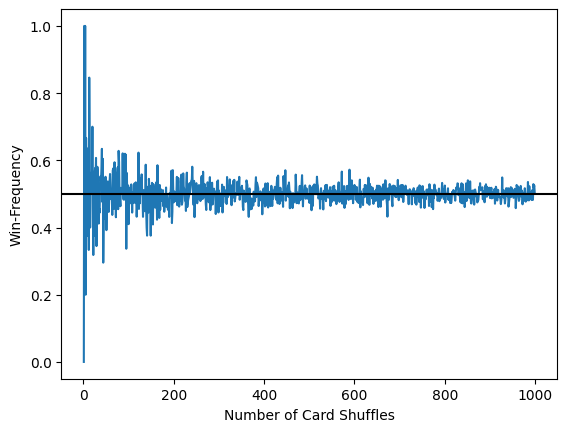

The win-frequency for 10,000 shuffles is 0.5035035035035035


In [ ]:
#Plotting simulated frequencies of wins

import matplotlib.pyplot as plt

np.random.seed(0)
def repeat_game(number_repeats):
    observations = np.array([execute_strategy() for _ in range(number_repeats)])
    return observations.mean()

frequencies = []
for i in range(1, 1000):
    frequencies.append(repeat_game(i))

plt.plot(list(range(1, 1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of Card Shuffles')
plt.ylabel('Win-Frequency')
plt.show()
print(f"The win-frequency for 10,000 shuffles is {frequencies[-1]}")

The frequency range 0.488938 - 0.509494 represents a 97.00% confidence interval


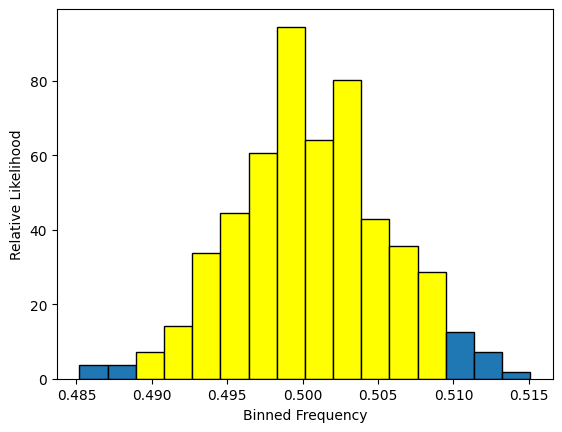

In [ ]:
#Computing the confidence interval for 3 million shuffles

np.random.seed(0)

def compute_high_confidence_interval(likelihoods, bin_width):
  peak_index = likelihoods.argmax()
  area = likelihoods[peak_index] * bin_width
  start_index, end_index = peak_index, peak_index + 1
  while area < 0.95:
    if start_index > 0: start_index -= 1
    if end_index < likelihoods.size - 1: end_index += 1
    area = likelihoods[start_index: end_index + 1].sum() * bin_width
  range_start, range_end = bin_edges[start_index], bin_edges[end_index]
  range_string = f"{range_start:.6f} - {range_end:.6f}"
  print((f"The frequency range {range_string} represents a " f"{100 * area:.2f}% confidence interval"))
  return start_index, end_index

frequency_array = np.array([repeat_game(10000) for _ in range(300)])

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)

bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
  patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

In [ ]:
#don't really need it but still will code it here

import datetime
now = datetime.datetime.now()
print(now.time())
print(datetime.datetime.now())

20:07:10.834847
2025-03-13 20:07:10.835696


In [ ]:
##Computing the confidence interval for 150 million shuffles

np.random.seed(0)

frequency_array = np.array([repeat_game(5000) for _ in range(300)]) # book says 50K x 3K takes an hour
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)

bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.485492 - 0.513323 represents a 97.67% confidence interval


(1, 10)

In [ ]:
#Computing the confidence interval for an updated strategy

#I replaced 50000 with 500 and 3000 with 300 because my Collab would not load

np.random.seed(0)
def repeat_game(number_repeats, min_red_fraction):
  observations = np.array([execute_strategy(min_red_fraction) for _ in range(number_repeats)])
  return observations.mean()

frequency_array = np.array([repeat_game(500, 0.75) for _ in range(300)])
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)

bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.458235 - 0.547529 represents a 95.67% confidence interval


(2, 13)

In [ ]:
#Applying a basic strategy to a 10-card deck

import itertools

def get_matching_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space
if event_condition(outcome)])

def compute_event_probability(event_condition, generic_sample_space):
  event = get_matching_event(event_condition, generic_sample_space)
  if type(generic_sample_space) == type(set()):
    return len(event) / len(generic_sample_space)

  event_size = sum(generic_sample_space[outcome] for outcome in event)
  return event_size / sum(generic_sample_space.values())

total_cards = 10
total_red_cards = int(total_cards / 2)
total_black_cards = total_red_cards
unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
win_condition = lambda x: execute_strategy(shuffled_deck=np.array(x))
prob_win = compute_event_probability(win_condition, sample_space)
print(f"Probability of a win is {prob_win}")

Probability of a win is 0.5


In [ ]:
#Applying multiple strategies to a 10-card deck

def scan_strategies():
  fractions = [value / 100 for value in range(50, 100)]
  probabilities = []
  for frac in fractions:
    win_condition = lambda x: execute_strategy(frac, shuffled_deck=np.array(x))
    probabilities.append(compute_event_probability(win_condition, sample_space))
    return probabilities

probabilities = scan_strategies()
print(f"Lowest probability of win is {min(probabilities)}")
print(f"Highest probability of win is {max(probabilities)}")

Lowest probability of win is 0.5
Highest probability of win is 0.5


In [ ]:
#Applying multiple strategies to multiple decks

for total_cards in [2, 4, 6, 8]:
  total_red_cards = int(total_cards / 2)
  total_black_cards = total_red_cards
  unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
  sample_space = set(itertools.permutations(unshuffled_deck))
  probabilities = scan_strategies()
  if all(prob == 0.5 for prob in probabilities):
    print(f"No winning strategy found for deck of size {total_cards}")
  else:
    print(f"Winning strategy found for deck of size {total_cards}")

No winning strategy found for deck of size 2
No winning strategy found for deck of size 4
No winning strategy found for deck of size 6
No winning strategy found for deck of size 8


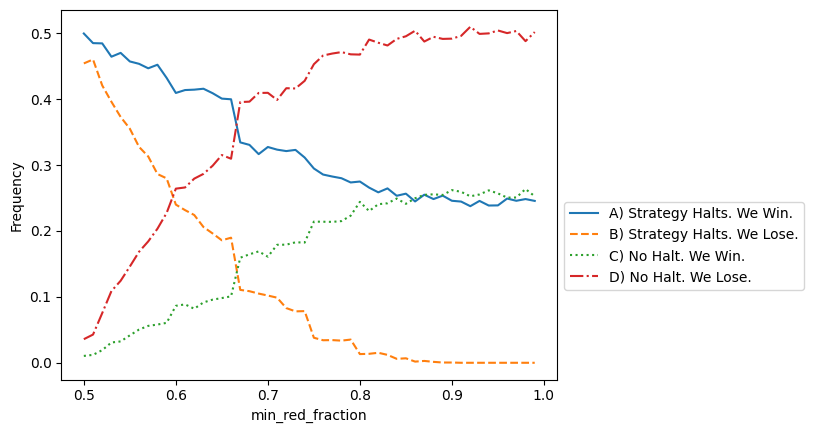

In [ ]:
#Plotting strategy outcomes across a 52-card deck

#Again, replaced 50000 with 500 because Collab would not work

np.random.seed(0)
total_cards = 52
total_red_cards = 26
unshuffled_deck = red_cards + black_cards

def repeat_game_detailed(number_repeats, min_red_fraction):
  observations = [execute_strategy(min_red_fraction, return_index=True) for _ in range(num_repeats)]
  successes = [index for index, card, in observations if card == 1]
  halt_success = len([index for index in successes if index != 51])
  no_halt_success = len(successes) - halt_success

  failures = [index for index, card, in observations if card == 0]
  halt_failure = len([index for index in failures if index != 51])
  no_halt_failure = len(failures) - halt_failure
  result = [halt_success, halt_failure, no_halt_success, no_halt_failure]
  return [r / number_repeats for r in result]

fractions = [value / 100 for value in range(50, 100)]
num_repeats = 5000
result_types = [[], [], [], []]

for fraction in fractions:
  result = repeat_game_detailed(num_repeats, fraction)
  for i in range(4):
    result_types[i].append(result[i])

plt.plot(fractions, result_types[0], label='A) Strategy Halts. We Win.')
plt.plot(fractions, result_types[1], linestyle='--', label='B) Strategy Halts. We Lose.')
plt.plot(fractions, result_types[2], linestyle=':', label='C) No Halt. We Win.')
plt.plot(fractions, result_types[3], linestyle='-.', label='D) No Halt. We Lose.')
plt.xlabel('min_red_fraction')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
#The optimal winning strategy

def optimal_strategy(shuffled_deck):
  return shuffled_deck[0]

Summary:
---

Probabilities can be counterintuitive. Innately, we assumed that our planned
card game strategy would perform better than random. However, this proved
not to be the case. We must be careful when dealing with random processes. It’s
best to rigorously test all our intuitive assumptions prior to wagering on any
future outcome.

Sometimes, even large-scale simulations fail to find a probability within the
required level of precision. However, by simplifying our problem, we can utilize
sample spaces to yield insights. Sample spaces allow us to test our intuition. If
our intuitive solution fails on a toy version of the problem, it is also likely to fail
on the actual version of the problem.